In [1]:
import os
os.environ["PATH"] += "/bioinformatics/anaconda3_052020/condabin:/bioinformatics/A.C.Rsuite:/bioinformatics/bowtie2:/bioinformatics/BSseeker2:/bioinformatics/adapterremoval:/bioinformatics/idr/bin:/bioinformatics/glassutils/scripts:/bioinformatics/STAR/bin/Linux_x86_64_static:/bioinformatics/scripts:/bioinformatics/sratoolkit/bin:/bioinformatics/FastQC:/bioinformatics/bedtools/bin:/bioinformatics/samtools/bin:/bioinformatics/anaconda3_052020/bin:/bioinformatics/homer/bin:/usr/local/sbin:/usr/sbin:/usr/bin:/usr/local/bin:/usr/local/lib:/bioinformatics/anaconda3_052020/condabin:/bioinformatics/A.C.Rsuite:/bioinformatics/bowtie2:/bioinformatics/BSseeker2:/bioinformatics/adapterremoval:/bioinformatics/idr/bin:/bioinformatics/glassutils/scripts:/bioinformatics/STAR/bin/Linux_x86_64_static:/bioinformatics/scripts:/bioinformatics/sratoolkit/bin:/bioinformatics/FastQC:/bioinformatics/bedtools/bin:/bioinformatics/samtools/bin:/bioinformatics/anaconda3_052020/bin:/bioinformatics/homer/bin:/usr/local/sbin:/usr/sbin:/usr/bin:/usr/local/bin:/usr/local/lib:"
!python -m ipykernel install --user

Installed kernelspec python3 in /gpfs/data01/glasslab/home/jhauk/.local/share/jupyter/kernels/python3


In [18]:
!rnaPipe.R ../data_shortened/BMDMs_6_17_24_v2_Sample_Sheet.txt -o ../data_shortened/Cutoff_1/


Get the alignment status: --------------------
alignStats.R ../data_shortened/BMDMs_6_17_24_v2_Sample_Sheet.txt > ../data_shortened/Cutoff_1//alignStats.txt 
Warning message:
In read.table(strSample, sep = "\t", comment.char = "", as.is = T) :
  incomplete final line found by readTableHeader on '../data_shortened/BMDMs_6_17_24_v2_Sample_Sheet.txt'

Quantification of genes: --------------------
rnaQuan.R ../data_shortened/BMDMs_6_17_24_v2_Sample_Sheet.txt -o ../data_shortened/Cutoff_1//rnaQuan/ -g mm10 -l 200 -t jhauk_BMDMs_6_17_24_v2_Sample_Sheet 
Warning message:
no DISPLAY variable so Tk is not available 

	Step 1: obtain the condenseGenes raw counts
Warning message:
In read.table(strSample, comment.char = "", as.is = T, sep = "\t",  :
  incomplete final line found by readTableHeader on '../data_shortened/BMDMs_6_17_24_v2_Sample_Sheet.txt'
		 analyzeRepeats.pl rna mm10 -condenseGenes -count exons -noadj  -d /gpfs/data01/glasslab/home/seyano/LXR_code/WT_BMDM_hep_20240617/WT_BMDM_RNA_

## Before Progressing Too Far Check tagPosition Score in /data_shortened/Cutoff_1/alignStats.txt

In [19]:
!rnaDiff.R ../data_shortened/BMDMs_6_17_24_v2_Sample_Sheet.txt -c ../data_shortened/Cutoff_1/rnaQuan/rawC.txt -t ../data_shortened/Cutoff_1/rnaQuan/rawT.txt -f 0.58 -o ../data_shortened/Cutoff_0.58/


	Step 1: check the group information
Warning message:
In read.table(strSample, as.is = T, comment.char = "", sep = "\t",  :
  incomplete final line found by readTableHeader on '../data_shortened/BMDMs_6_17_24_v2_Sample_Sheet.txt'
     TPMid             CountID           sID               grp         
[1,] "BMDM_veh_rep1"   "BMDM_veh_rep1"   "BMDM_veh_rep1"   "BMDM_veh"  
[2,] "BMDM_veh_rep2"   "BMDM_veh_rep2"   "BMDM_veh_rep2"   "BMDM_veh"  
[3,] "BMDM_DMHCA_rep1" "BMDM_DMHCA_rep1" "BMDM_DMHCA_rep1" "BMDM_DMHCA"
[4,] "BMDM_DMHCA_rep2" "BMDM_DMHCA_rep2" "BMDM_DMHCA_rep2" "BMDM_DMHCA"
[5,] "BMDM_DMHCA_rep3" "BMDM_DMHCA_rep3" "BMDM_DMHCA_rep3" "BMDM_DMHCA"
[6,] "BMDM_GW_rep1"    "BMDM_GW_rep1"    "BMDM_GW_rep1"    "BMDM_GW"   
[7,] "BMDM_GW_rep2"    "BMDM_GW_rep2"    "BMDM_GW_rep2"    "BMDM_GW"   
[8,] "BMDM_GW_rep3"    "BMDM_GW_rep3"    "BMDM_GW_rep3"    "BMDM_GW"   

	Step 2: pair-wised group comparisons
		 BMDM_DMHCA vs BMDM_veh 
-- note: fitType='parametric', but the dispersion trend

## Venn Diagrams

In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn2_circles

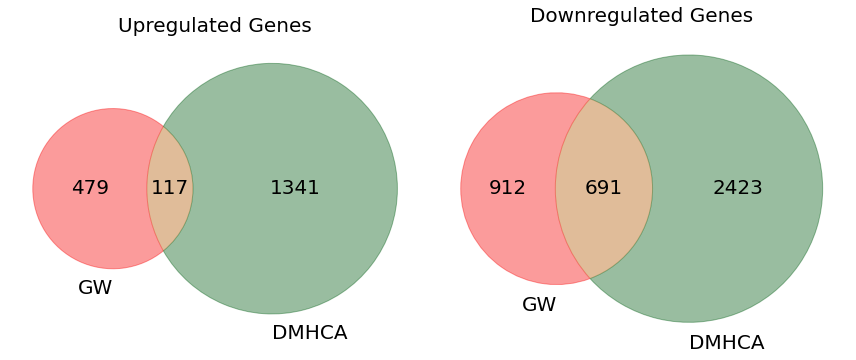

In [23]:
GW_df = pd.read_csv('../data_shortened/Cutoff_0.58/BMDM_veh.vs.BMDM_GW.scatter.txt', sep='\t')
GW_df_set_upper = set(GW_df.loc[GW_df['log2FoldChange'] > 0.58, 'Unnamed: 0'])
GW_df_set_lower = set(GW_df.loc[GW_df['log2FoldChange'] < -0.58, 'Unnamed: 0'])

for veh_comp in os.listdir('../data_shortened/Cutoff_0.58'):
    if (('veh.vs.' in veh_comp) & ('txt' in veh_comp)) & (veh_comp != 'BMDM_veh.vs.BMDM_GW.scatter.txt'):
        file_path = os.path.join('../data_shortened/Cutoff_0.58/', veh_comp)
        
        if os.path.isfile(file_path):
            df = pd.read_csv(file_path, sep='\t')

            second_ligand = veh_comp[17:-12]
            
            df_set_upper = set(df.loc[df['log2FoldChange'] > 0.58, 'Unnamed: 0'])
            df_set_lower = set(df.loc[df['log2FoldChange'] < -0.58, 'Unnamed: 0'])
            
            plt.figure(figsize=(12, 6))

            # Venn diagram for upper values
            plt.subplot(1, 2, 1)
            venn = venn2([GW_df_set_upper, df_set_upper], ('GW', second_ligand))

            for text in venn.set_labels:
                text.set_fontsize(20)

            venn.get_patch_by_id('10').set_color('#f70707')
            venn.get_patch_by_id('01').set_color('#005c12')

            # Add labels inside the Venn diagram circles
            for idx in ['10', '01', '11']:
                if venn.get_label_by_id(idx) is not None:
                    names = ','.join(venn.get_label_by_id(idx).get_text().split(','))
                    venn.get_label_by_id(idx).set_text(names)
                    venn.get_label_by_id(idx).set_fontsize(20)

            plt.title("Upregulated Genes", fontsize=20)

            # Venn diagram for upper values
            plt.subplot(1, 2, 2)
            venn = venn2([GW_df_set_lower, df_set_lower], ('GW', second_ligand))

            for text in venn.set_labels:
                text.set_fontsize(20)

            venn.get_patch_by_id('10').set_color('#f70707')
            venn.get_patch_by_id('01').set_color('#005c12')

            # Add labels inside the Venn diagram circles
            for idx in ['10', '01', '11']:
                if venn.get_label_by_id(idx) is not None:
                    names = ','.join(venn.get_label_by_id(idx).get_text().split(','))
                    venn.get_label_by_id(idx).set_text(names)
                    venn.get_label_by_id(idx).set_fontsize(20)

            plt.title("Downregulated Genes", fontsize=20)

            plt.tight_layout()
            
            
            plt.savefig(os.path.join('../results_shortened/Venn_Diagram/', f'GWvs{second_ligand}_venn.png'))
    

## PTMs

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t, f_oneway
import re

In [55]:
# Load in data
rawT = pd.read_csv('../data_shortened/Cutoff_1/rnaQuan/rawT.txt', sep='\t')
rawT = rawT.rename(columns = {'Unnamed: 0': 'Gene'})

# Extract condition names
condition_map = {}

for col in rawT.columns:
    match = re.match(r'(.+?)_(rep\d+|spare\d+)$', col)
    if match:
        condition = match.group(1)
        condition_map.setdefault(condition, []).append(col)
        
# Calculate means and standard deviations
mean_df = pd.DataFrame({'Gene': rawT['Gene']})
std_df = pd.DataFrame({'Gene': rawT['Gene']})

for condition, cols in condition_map.items():
    mean_df[f'{condition}_mean'] = rawT[cols].mean(axis=1)
    std_df[f'{condition}_std'] = rawT[cols].std(axis=1)

# Combine the results
result = pd.merge(mean_df, std_df, on='Gene')
result.head()

,Gene,BMDM_veh_mean,BMDM_DMHCA_mean,BMDM_GW_mean,BMDM_veh_std,BMDM_DMHCA_std,BMDM_GW_std
0,Dap3,9.8740,13.79,11.634,0.257387,23.884981,14.206784
1,Slc22a29,0.0000,0.00,0.000,0.000000,0.000000,0.000000
2,P2rx6,0.2185,0.00,0.000,0.176070,0.000000,0.000000
3,Aldh3b3,0.0090,0.00,0.000,0.012728,0.000000,0.000000
4,Hist1h4k,1.1060,0.00,0.000,0.479418,0.000000,0.000000


In [64]:
condition_map

{'BMDM_veh': ['BMDM_veh_rep1', 'BMDM_veh_rep2'],
 'BMDM_DMHCA': ['BMDM_DMHCA_rep1', 'BMDM_DMHCA_rep2', 'BMDM_DMHCA_rep3'],
 'BMDM_GW': ['BMDM_GW_rep1', 'BMDM_GW_rep2', 'BMDM_GW_rep3']}

In [57]:
def calculate_p_values_and_thresholds(values, alpha=0.05):
    # Extract vehicle values
    veh_values = values[condition_map['BMDM_veh']].values.flatten()

    # Group other conditions
    groups = {key: values[cols].values.flatten()
              for key, cols in condition_map.items() if key != 'BMDM_veh'}

    # Calculate p-values and thresholds
    p_values = {}
    thresholds = {}
    df = len(veh_values) + sum(len(g) for g in groups.values()) - 2
    t_critical = t.ppf(1 - alpha / 2, df)

    for key, group in groups.items():
        f_stat, p_val = f_oneway(veh_values, group)
        p_values[key] = p_val
        
        # Calculate the standard error
        standard_error = np.sqrt(np.var(veh_values) / len(veh_values) + np.var(group) / len(group))
        threshold = np.mean(veh_values) + t_critical * standard_error
        thresholds[key] = threshold / np.mean(veh_values)  # Normalize by the mean of veh_values
        
        print(f"{key}: p-value = {p_val}, threshold (before normalization) = {threshold}")

    return p_values, thresholds

In [58]:
goi = ['Abca1', 'Abcg1', 'Fasn', 'Scd1', 'Srebf1', 'Dhcr24']
rawT = rawT[rawT['Gene'].isin(goi)]

In [59]:
rawT

,Gene,BMDM_veh_rep1,BMDM_veh_rep2,BMDM_DMHCA_rep1,BMDM_DMHCA_rep2,BMDM_DMHCA_rep3,BMDM_GW_rep1,BMDM_GW_rep2,BMDM_GW_rep3
4570,Abca1,20.552,18.422,8.107,56.641,76.441,173.144,234.292,174.726
6689,Dhcr24,33.257,39.274,9.036,7.526,0.000,42.938,0.000,131.020
8113,Fasn,19.273,21.578,0.000,18.335,14.544,66.912,106.600,87.682
11819,Abcg1,99.089,98.764,181.703,326.046,272.840,445.598,367.917,472.117
15566,Srebf1,32.947,37.047,65.749,117.161,15.422,192.279,202.635,445.901
23578,Scd1,2.119,1.853,0.301,16.434,0.000,25.513,45.497,2.018


In [70]:
def plot_gene_expression(goi, rawT, rawT_means, rawT_stds):
    for gene in goi:
        gene_data = rawT_means[rawT_means['Gene'] == gene]
        gene_stds = rawT_stds[rawT_stds['Gene'] == gene]
        
        # Normalize the means and stds by 'veh'
        veh_value = gene_data['BMDM_veh_mean'].values[0]
        condition_means = {cond: gene_data[f"{cond}_mean"].values[0] / veh_value for cond in condition_map.keys()}
        condition_stds = {cond: gene_stds[f"{cond}_std"].values[0] / veh_value for cond in condition_map.keys()}
        
        # Calculate p-values and thresholds
        p_values, thresholds = calculate_p_values_and_thresholds(rawT[rawT['Gene'] == gene])
        print(f"Thresholds for {gene}: {thresholds}")
        
        plt.figure(figsize=(10, 8))

        # Plot hollow bars with error bars
        plt.bar(condition_means.keys(), condition_means.values(), edgecolor="black", facecolor="none")
        plt.errorbar(list(condition_means.keys()), list(condition_means.values()), 
             yerr=list(condition_stds.values()), color="black", fmt=' ')

        # Normalize and plot individual replicates
        individual_gene_data = rawT[rawT['Gene'] == gene]

        if individual_gene_data.empty:
            print(f"No individual data found for gene: {gene}")

        for i, (cond, reps) in enumerate(condition_map.items()):
            if all(rep in individual_gene_data.columns for rep in reps):
                normalized_vals = individual_gene_data[reps].div(veh_value, axis=0)
                y_values = normalized_vals.values.flatten()
                x_positions = np.full_like(y_values, i)

                if len(x_positions) == len(y_values):
                    plt.scatter(x_positions, y_values, color='black', s=100, edgecolor='white', zorder=3)
                else:
                    print(f"Size mismatch for {gene}, condition {cond}: x_positions ({len(x_positions)}) != y_values ({len(y_values)})")
            else:
                print(f"Missing columns for {gene}, condition {cond}: {reps}")

        # Annotate p-values
        max_y = max(condition_means.values()) + max(condition_stds.values())
        plt.ylim(0, max_y * 1.3)

        for i, cond in enumerate(condition_means):
            if cond in thresholds and not np.isnan(thresholds[cond]):
                p_text = f"{p_values[cond]:.2e}" if p_values[cond] < 0.01 else f"{p_values[cond]:.2f}"
                plt.text(i, max_y * 1.2, p_text, ha='center', va='bottom', color='black')

        plt.ylabel('Rel. Expression \n Normalized to veh')
        plt.xlabel('Ligands')
        plt.xticks(rotation=0)
        plt.title(gene)
        plt.savefig(f'../results_shortened/PTMs/{gene}_PTM.png')
        plt.show()

BMDM_DMHCA: p-value = 0.3701394873370203, threshold (before normalization) = 60.08475822849326
BMDM_GW: p-value = 0.006737523016387373, threshold (before normalization) = 59.73521111879889
Thresholds for Abca1: {'BMDM_DMHCA': 3.083325202878496, 'BMDM_GW': 3.0653877517729193}


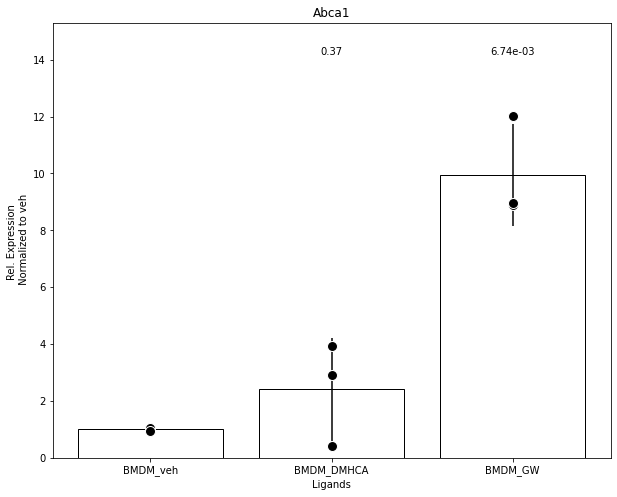

BMDM_DMHCA: p-value = 0.05935220369323296, threshold (before normalization) = 183.12841151919505
BMDM_GW: p-value = 0.003840974772621201, threshold (before normalization) = 161.39173506248238
Thresholds for Abcg1: {'BMDM_DMHCA': 1.8511562778345039, 'BMDM_GW': 1.6314307598316162}


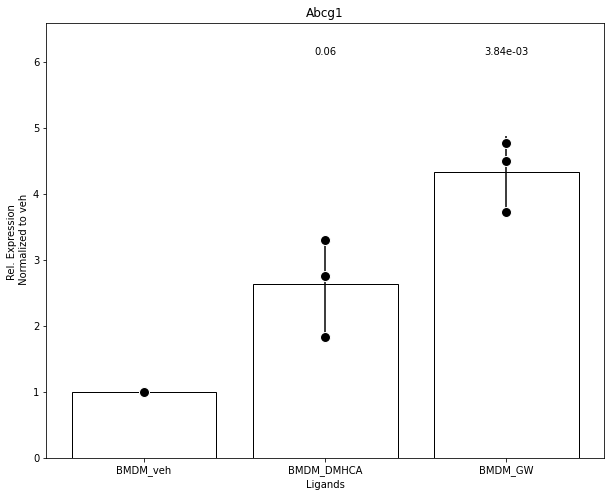

BMDM_DMHCA: p-value = 0.2835908463432107, threshold (before normalization) = 31.766508466684144
BMDM_GW: p-value = 0.020536642715071524, threshold (before normalization) = 43.41023208930518
Thresholds for Fasn: {'BMDM_DMHCA': 1.5552377404070472, 'BMDM_GW': 2.125295933480462}


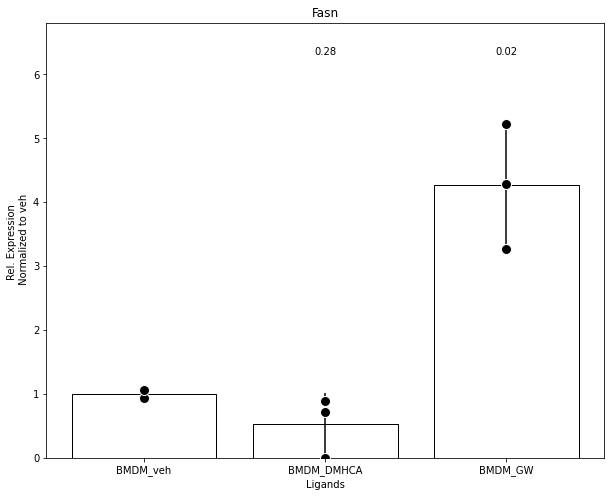

BMDM_DMHCA: p-value = 0.6436246358294084, threshold (before normalization) = 12.834072425619743
BMDM_GW: p-value = 0.2619408440275078, threshold (before normalization) = 27.090486683625528
Thresholds for Scd1: {'BMDM_DMHCA': 6.462272117633304, 'BMDM_GW': 13.640728440899055}


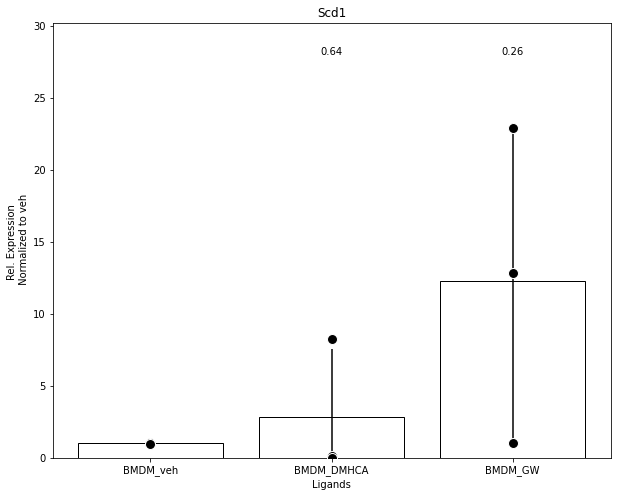

BMDM_DMHCA: p-value = 0.47234124170496145, threshold (before normalization) = 93.78243826005283
BMDM_GW: p-value = 0.10572125800787267, threshold (before normalization) = 200.5977815424523
Thresholds for Srebf1: {'BMDM_DMHCA': 2.679727926966678, 'BMDM_GW': 5.731856488911973}


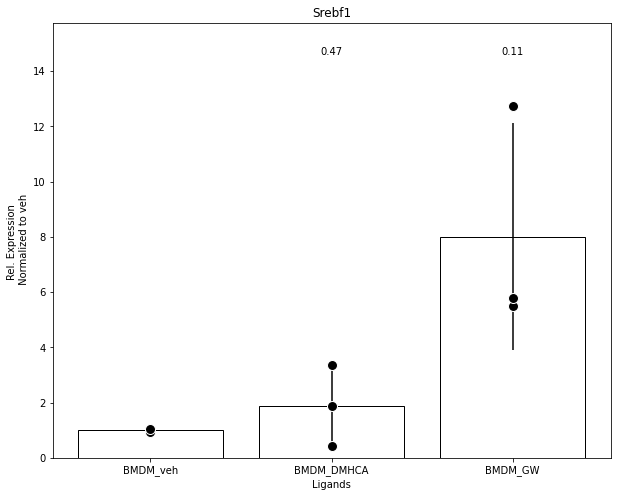

BMDM_DMHCA: p-value = 0.005439882592988409, threshold (before normalization) = 43.89885911452308
BMDM_GW: p-value = 0.6924068078431856, threshold (before normalization) = 113.48663973385119
Thresholds for Dhcr24: {'BMDM_DMHCA': 1.2104854231852056, 'BMDM_GW': 3.1293278662599766}


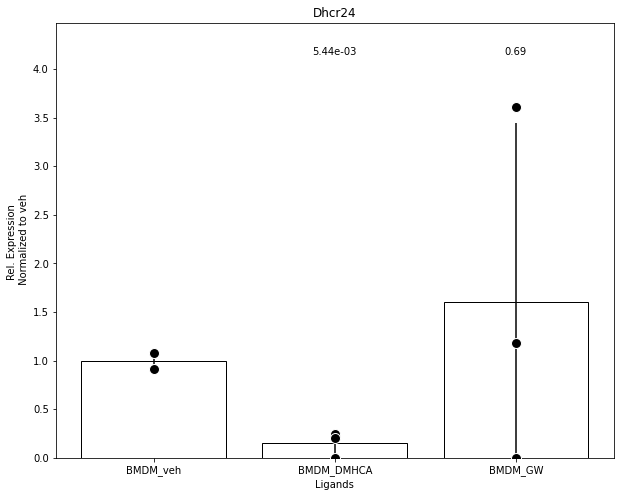

In [71]:
plot_gene_expression(goi, rawT, mean_df, std_df)

## Gene Ontology